# Lista de Exercícios 5
- Ianka Karúzia Rabelo de Oliveira - 365560

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from libs import metrics, linear_model, resample

### Criando dataset

In [3]:
columns = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 
           'age', 'outcome']
dataset = pd.read_csv('pima-indians-diabetes.csv', names=columns)

In [4]:
dataset.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Train/Test Split

In [5]:
data = dataset.values

In [6]:
X = data[:,:8]
y = data[:,8]
idx_train, idx_test = resample.split_stratified_train_test(y,0.7,0)

In [7]:
X_train = X[idx_train]
y_train = y[idx_train]
X_test = X[idx_test]
y_test = y[idx_test]

### Logistic Regression
- Manual

In [8]:
modelLR = linear_model.LogisticRegression()

In [9]:
modelLR.fit(X_train,y_train)

Optimization terminated successfully.
         Current function value: 263.190012
         Iterations: 21
         Function evaluations: 28
         Gradient evaluations: 28


In [10]:
predLR = modelLR.predict(X_test)

- Sklearn

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
modelSK = LogisticRegression()

In [13]:
modelSK.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predSK = modelSK.predict(X_test)

### Avaliação utilizando as métricas
- Manual

In [15]:
#Predições Manuais
print('Accuracy: ', metrics.accuracy(y_test, predLR))
print('Precision: ', metrics.precision(y_test, predLR))
print('Recall: ', metrics.recall(y_test, predLR))
print('F1 Measure: ', metrics.f1_measure(y_test, predLR))

Accuracy:  0.7748917748917749
Precision:  0.5555555555555556
Recall:  0.7377049180327869
F1 Measure:  0.6338028169014086


In [16]:
#Predições do Sklearn
print('Accuracy: ', metrics.accuracy(y_test, predSK))
print('Precision: ', metrics.precision(y_test, predSK))
print('Recall: ', metrics.recall(y_test, predSK))
print('F1 Measure: ', metrics.f1_measure(y_test, predSK))

Accuracy:  0.7878787878787878
Precision:  0.5679012345679012
Recall:  0.7666666666666667
F1 Measure:  0.6524822695035462


- Sklearn

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,roc_curve, auc

In [18]:
print('Accuracy: ', accuracy_score(y_test, predSK))
print('\n')
print(confusion_matrix(y_test, predSK))
print(classification_report(y_test, predSK))

Accuracy:  0.787878787879


[[136  14]
 [ 35  46]]
             precision    recall  f1-score   support

        0.0       0.80      0.91      0.85       150
        1.0       0.77      0.57      0.65        81

avg / total       0.79      0.79      0.78       231



In [19]:
print('Accuracy: ', accuracy_score(y_test, predLR))
print('\n')
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

Accuracy:  0.774891774892


[[134  16]
 [ 36  45]]
             precision    recall  f1-score   support

        0.0       0.79      0.89      0.84       150
        1.0       0.74      0.56      0.63        81

avg / total       0.77      0.77      0.77       231



### Métrica AUC (Area Under Curve) e Desenho da Curva ROC

In [20]:
y_score = modelSK.predict_proba(X_test)[:,1]

In [21]:
roc_auc_score(y_test, y_score)

0.86773662551440323

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

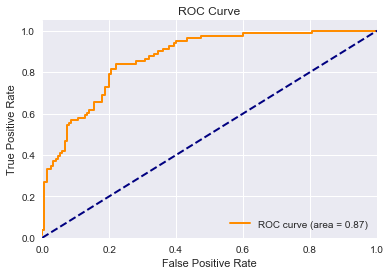

In [23]:
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()